In [2]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
file='database.sqlite'

In [3]:
conn=sqlite3.connect(file)
tables=pd.read_sql('''select * from sqlite_master where type='table';''',conn)

In [5]:
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [6]:
countries=pd.read_sql('''select* from Country;''',conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [7]:
leagues=pd.read_sql('''select * from League;''',conn)
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [12]:
leagues=pd.read_sql('''select League.id,Country.name,League.name
From League
Join Country
On League.id=Country.id;''',conn)
leagues

,id,name,name
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


In [19]:
cursor1=conn.execute('select * from Match')
names1=list(map(lambda x:x[0],cursor1.description))
names1

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [16]:
cursor=conn.execute('select * from Team')
names=list(map(lambda x:x[0],cursor.description))
names

['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name', 'team_short_name']

In [22]:
detail_matches=pd.read_sql('''select Match.id, Country.name as country_name, League.name as league_name, season, stage, HT.team_long_name as home_team,
AT.team_long_name as away_team, home_team_goal,away_team_goal
from Match
join Country on Country.id=Match.country_id
join League on League.id=Match.league_id
join Team as HT on HT.team_api_id=Match.home_team_api_id
join Team as AT on AT.team_api_id=Match.away_team_api_id
where country_name='Spain'
order by date
limit 10;''',conn)
detail_matches

,id,country_name,league_name,season,stage,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,Atlético Madrid,Málaga CF,4,0


In [28]:
season_stats=pd.read_sql('''select Match.id, Country.name as country_name, League.name as league_name, season,
count(distinct stage) as number_of_stages,
count(distinct HT.team_long_name) as number_of_teams,

avg(home_team_goal) as avg_home_team_scores,
avg(away_team_goal) as avg_away_team_goals,
avg(home_team_goal-away_team_goal) as avg_goal_diff,

avg(home_team_goal+away_team_goal) as avg_goals_scored,
sum(home_team_goal+away_team_goal) as total_goals_scored
from Match
join Country on Country.id=Match.country_id
join League on League.id=Match.league_id
join Team as HT on HT.team_api_id=Match.home_team_api_id
join Team as AT on AT.team_api_id=Match.away_team_api_id
where country_name in ('England','France', 'Germany', 'Spain', 'Italy')
group by country_name,league_name,season;''',conn)
season_stats

,id,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scores,avg_away_team_goals,avg_goal_diff,avg_goals_scored,total_goals_scored
0,1729,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
1,2109,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
2,2489,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
3,2869,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
4,3249,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
5,3629,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
6,4009,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
7,4389,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
8,4769,France,France Ligue 1,2008/2009,38,20,1.286842,0.971053,0.315789,2.257895,858
9,5149,France,France Ligue 1,2009/2010,38,20,1.389474,1.021053,0.368421,2.410526,916


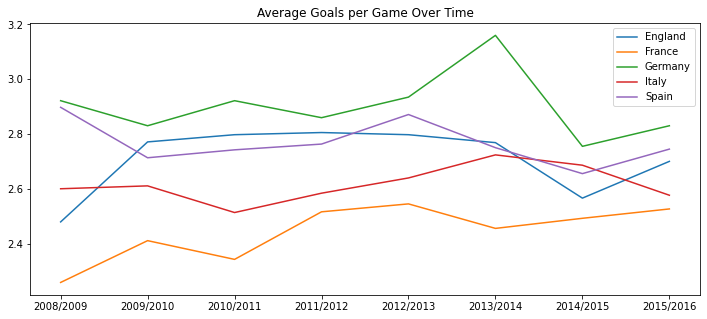

In [32]:
df = pd.DataFrame(index=np.sort(season_stats['season'].unique()), columns=season_stats['country_name'].unique())

df.loc[:,'Germany'] = list(season_stats.loc[season_stats['country_name']=='Germany','avg_goals_scored'])
df.loc[:,'Spain']   = list(season_stats.loc[season_stats['country_name']=='Spain','avg_goals_scored'])
df.loc[:,'France']   = list(season_stats.loc[season_stats['country_name']=='France','avg_goals_scored'])
df.loc[:,'Italy']   = list(season_stats.loc[season_stats['country_name']=='Italy','avg_goals_scored'])
df.loc[:,'England']   = list(season_stats.loc[season_stats['country_name']=='England','avg_goals_scored'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

In [49]:
df = pd.DataFrame(index=np.sort(season_stats['season'].unique()), columns=season_stats['country_name'].unique())

x=season_stats[season_stats['country_name']=='Germany']
y=x['avg_goals_scored']

16    2.921569
17    2.830065
18    2.921569
19    2.859477
20    2.934641
21    3.160131
22    2.754902
23    2.830065
Name: avg_goals_scored, dtype: float64

In [51]:
cursor=conn.execute('select * from Player')
names=list(map(lambda x:x[0],cursor.description))
names

['id',
 'player_api_id',
 'player_name',
 'player_fifa_api_id',
 'birthday',
 'height',
 'weight']

In [52]:
cursor=conn.execute('select * from Player_Attributes')
names=list(map(lambda x:x[0],cursor.description))
names

['id',
 'player_fifa_api_id',
 'player_api_id',
 'date',
 'overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [63]:
Player_data=pd.read_sql('''select case
when round(height)<165 then 165
when round(height)>195 then 195
else round(height)
end as calc_height,
count(height) as distribution,
avg(PA_grouped.overall_rating) as avg_overall_rating,
avg(PA_grouped.potential) as avg_potential,
avg(weight) as avg_weight
from Player
left join Player_attributes as PA_grouped on PA_grouped.player_api_id=Player.player_api_id
group by calc_height
order by calc_height;''',conn)
Player_data

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,1178,69.450043,74.976089,139.785229
1,168.0,1992,69.309788,74.209889,145.604418
2,170.0,7103,69.682806,74.865330,148.154723
3,173.0,8931,68.722416,74.203352,153.323928
4,175.0,19615,68.770503,73.709634,156.345756
5,178.0,24264,68.197063,73.259111,161.049374
6,180.0,22876,68.265716,73.284592,165.786064
7,183.0,32203,68.415575,73.140054,170.439897
8,185.0,21429,68.557339,73.188110,174.935228
9,188.0,21851,68.751219,73.501932,179.627980


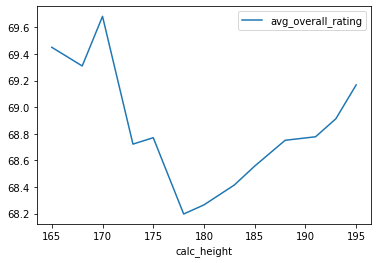

In [64]:
ax=plt.gca()
Player_data.plot(kind='line',x='calc_height',y='avg_overall_rating',ax=ax)
plt.show()

In [4]:
xt=pd.read_sql('''select * from Player_attributes;''',conn)
xt

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0
